# Data Cleaning

In [77]:
#--นำเข้าข้อมูลดิบ (Raw Data) ---
import pandas as pd
file_path = 'Current health expenditure.csv'
df = pd.read_csv(file_path)

print("1. ข้อมูลดิบ (Raw Data)แสดง 5 แถวแรก")
print(df.head())

1. ข้อมูลดิบ (Raw Data)แสดง 5 แถวแรก
                  Country Name          IncomeGroup Country Code      2000  \
0                        Aruba          High income          ABW       NaN   
1  Africa Eastern and Southern                  NaN          AFE  5.654027   
2                  Afghanistan           Low income          AFG       NaN   
3   Africa Western and Central                  NaN          AFW  3.462852   
4                       Angola  Lower middle income          AGO  1.908599   

       2001      2002      2003      2004      2005       2006  ...      2013  \
0       NaN       NaN       NaN       NaN       NaN        NaN  ...       NaN   
1  5.813231  5.442299  6.023682  6.109320  5.955198   5.972892  ...  6.161271   
2       NaN  9.443391  8.941258  9.808474  9.948289  10.622766  ...  8.805964   
3  3.486867  3.140402  4.437640  4.279378  4.132311   4.060231  ...  3.609185   
4  4.483516  3.329461  3.547973  3.967199  2.852195   2.685535  ...  2.732827   

       

In [78]:
#2. ค้นหาคอลัมน์ที่เป็นปี (เช่น '2000', '2001', ...)
#เราจะหาคอลัมน์ที่เป็นตัวเลข (ปี) อัตโนมัติ
year_cols = [col for col in df.columns if col.isdigit()]

#3. กำหนดคอลัมน์เป้าหมายที่จะเก็บไว้
#นี่คือคอลัมน์ "ทั้งหมด" ที่เราต้องการเก็บไว้
target_cols = ['Country Code', 'IncomeGroup'] + year_cols

print(f"2. คอลัมน์เป้าหมายที่จะเก็บไว้ ({len(target_cols)} คอลัมน์)")
print(target_cols)

2. คอลัมน์เป้าหมายที่จะเก็บไว้ (25 คอลัมน์)
['Country Code', 'IncomeGroup', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']


In [79]:
#เลือกเฉพาะคอลัมน์ที่ต้องการ (ลบคอลัมน์อื่นทิ้ง)
#เราจะเลือกเฉพาะ target_cols และใช้ .copy() เพื่อป้องกัน Warning
df_focused = df[target_cols].copy()

print("3. ข้อมูลหลังเลือกเฉพาะคอลัมน์ (ยังไม่ลบ NaN) ---")
print(df_focused.head())

3. ข้อมูลหลังเลือกเฉพาะคอลัมน์ (ยังไม่ลบ NaN) ---
  Country Code          IncomeGroup      2000      2001      2002      2003  \
0          ABW          High income       NaN       NaN       NaN       NaN   
1          AFE                  NaN  5.654027  5.813231  5.442299  6.023682   
2          AFG           Low income       NaN       NaN  9.443391  8.941258   
3          AFW                  NaN  3.462852  3.486867  3.140402  4.437640   
4          AGO  Lower middle income  1.908599  4.483516  3.329461  3.547973   

       2004      2005       2006      2007  ...      2013      2014  \
0       NaN       NaN        NaN       NaN  ...       NaN       NaN   
1  6.109320  5.955198   5.972892  5.994838  ...  6.161271  5.820881   
2  9.808474  9.948289  10.622766  9.904675  ...  8.805964  9.528878   
3  4.279378  4.132311   4.060231  3.845552  ...  3.609185  3.637259   
4  3.967199  2.852195   2.685535  2.974391  ...  2.732827  2.434129   

        2015       2016       2017       2018   

In [80]:
#ลบแถวที่มีค่าว่าง (NaN)
#.dropna() จะลบแถวใดก็ตามที่มีค่าว่าง "อย่างน้อยหนึ่งช่อง" ในแถวนั้น
rows_before = len(df_focused)
df_final = df_focused.dropna()
rows_after = len(df_final)

print(f"4. ลบแถวที่มีค่าว่าง (NaN)")
print(f"จำนวนแถว (ก่อนลบ NaN): {rows_before}")
print(f"จำนวนแถว (หลังลบ NaN): {rows_after}")
print("\n")

#ผลลัพธ์สุดท้าย
print("5. ข้อมูลที่ Clean แล้ว (Final Data)")
print(df_final.head())
print("\n")
df_final.info()

4. ลบแถวที่มีค่าว่าง (NaN)
จำนวนแถว (ก่อนลบ NaN): 266
จำนวนแถว (หลังลบ NaN): 184


5. ข้อมูลที่ Clean แล้ว (Final Data)
  Country Code          IncomeGroup      2000      2001      2002      2003  \
4          AGO  Lower middle income  1.908599  4.483516  3.329461  3.547973   
5          ALB  Upper middle income  5.944198  5.925845  5.664645  5.911408   
6          AND          High income  5.952764  5.858237  5.996212  5.547715   
8          ARE          High income  2.395045  2.484364  2.717709  2.646344   
9          ARG  Upper middle income  8.220011  8.371799  7.393312  6.894516   

       2004      2005      2006      2007  ...      2013      2014       2015  \
4  3.967199  2.852195  2.685535  2.974391  ...  2.732827  2.434129   2.605795   
5  5.893649  5.729545  5.631770  5.926091  ...  6.282863  6.434511   6.464119   
6  5.288469  5.594769  4.965300  4.923473  ...  6.799642  6.773080   6.915864   
8  2.462256  2.320211  2.325414  2.566027  ...  3.502222  3.534055   3.466094   


In [81]:
#เราจะ Melt df_final (ที่ Clean แล้ว)
print("6. กำลัง 'Melt' ข้อมูล (Wide to Long) เพื่อเตรียมพล็อตกราฟ...")
df_long = df_final.melt(
    id_vars=['Country Code', 'IncomeGroup'], #คอลัมน์ที่จะคงไว้
    var_name='Year',                      #คอลัมน์ใหม่สำหรับ "ปี"
    value_name='Expenditure (% GDP)'      #คอลัมน์ใหม่สำหรับ "ค่า"
)

#แปลง 'Year' (ที่เป็น Text) ให้เป็น 'ตัวเลข'
df_long['Year'] = pd.to_numeric(df_long['Year'])

print("ข้อมูลที่พร้อมสำหรับพล็อตกราฟ (Long Format):")
print("\n")
print(df_long.head())

6. กำลัง 'Melt' ข้อมูล (Wide to Long) เพื่อเตรียมพล็อตกราฟ...
ข้อมูลที่พร้อมสำหรับพล็อตกราฟ (Long Format):


  Country Code          IncomeGroup  Year  Expenditure (% GDP)
0          AGO  Lower middle income  2000             1.908599
1          ALB  Upper middle income  2000             5.944198
2          AND          High income  2000             5.952764
3          ARE          High income  2000             2.395045
4          ARG  Upper middle income  2000             8.220011


# K-Means Clustering

จุดประสงค์ในการวิเคราะห์

.----จำแนกกลุ่มประเทศตามลักษณะเชิงนโยบายด้านการจัดสรรทรัพยากรสุขภาพ โดยพิจารณาจาก สัดส่วนงบประมาณด้านสุขภาพต่อ GDP (% of GDP) ในสามมิติหลัก ได้แก่ ระดับการจัดสรร (mean_exp) เพื่อสะท้อนความสำคัญที่ประเทศให้กับภาคสุขภาพ, ความมีเสถียรภาพ (std_exp) เพื่อบ่งชี้ความคงที่ของนโยบายการใช้จ่าย, และ แนวโน้ม (growth_rate) เพื่อแสดงทิศทางการเปลี่ยนแปลงของการจัดสรรทรัพยากรในระยะเวลา โดยไม่เน้นปริมาณเงินที่ใช้จริง แต่เน้นพฤติกรรมเชิงนโยบายในภาพรวมของแต่ละประเทศ.

In [82]:
print("---Feature Engineering (สร้างตัวแปรใหม่) ---")

#mean_expenditure (ค่าเฉลี่ย 22 ปี)
#นี่คือ "ระดับ" การใช้จ่ายปกติของประเทศ
df_mean = df_long.groupby('Country Code')['Expenditure (% GDP)'].mean().to_frame(name='mean_exp')

#std_expenditure (ความผันผวน)
#นี่คือ "ความสม่ำเสมอ" (ค่ายิ่งน้อย = ยิ่งคงที่)
df_std = df_long.groupby('Country Code')['Expenditure (% GDP)'].std().to_frame(name='std_exp')

#growth_rate (อัตราการเติบโต)
#เราจะคำนวณอัตราการเติบโต "ทั้งหมด" (จากปีแรกสุด ไป ปีล่าสุด)
#(end - start) / start
#หาค่าปีแรกสุด (start) ของแต่ละประเทศ
df_start = df_long.sort_values('Year').drop_duplicates('Country Code', keep='first')
df_start = df_start.set_index('Country Code')['Expenditure (% GDP)'].to_frame(name='start_val')

#หาค่าปีล่าสุด (end) ของแต่ละประเทศ
df_end = df_long.sort_values('Year').drop_duplicates('Country Code', keep='last')
df_end = df_end.set_index('Country Code')['Expenditure (% GDP)'].to_frame(name='end_val')

#รวม start/end และคำนวณ growth
df_growth = df_start.join(df_end)
df_growth['growth_rate'] = (df_growth['end_val'] - df_growth['start_val']) / df_growth['start_val']

#รวมทุก Features เป็นตารางเดียว
df_features = df_mean.join(df_std).join(df_growth[['growth_rate']])

print("ตาราง 'พฤติกรรม' (Features) ที่สร้างเสร็จ:")
print("\n")
print(df_features.head())

---Feature Engineering (สร้างตัวแปรใหม่) ---
ตาราง 'พฤติกรรม' (Features) ที่สร้างเสร็จ:


              mean_exp   std_exp  growth_rate
Country Code                                 
AGO           2.969375  0.581332     0.533782
ALB           6.245909  0.528587     0.041971
AND           6.595969  1.050431     0.266099
ARE           3.489405  0.969225     0.952160
ARG           9.047444  1.166275     0.199883


---หา K ที่เหมาะสม (Elbow + Silhouette)---


C:\Users\Admin\AppData\Local\Temp\ipykernel_18224\291986612.py:48: UserWarning: Glyph 3592 (\N{THAI CHARACTER CHO CHAN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Admin\AppData\Local\Temp\ipykernel_18224\291986612.py:48: UserWarning: Glyph 3635 (\N{THAI CHARACTER SARA AM}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Admin\AppData\Local\Temp\ipykernel_18224\291986612.py:48: UserWarning: Glyph 3609 (\N{THAI CHARACTER NO NU}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Admin\AppData\Local\Temp\ipykernel_18224\291986612.py:48: UserWarning: Glyph 3623 (\N{THAI CHARACTER WO WAEN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Admin\AppData\Local\Temp\ipykernel_18224\291986612.py:48: UserWarning: Glyph 3585 (\N{THAI CHARACTER KO KAI}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Admin\AppData\Local\Temp\ipykernel_18224\291986612.py:48: UserWarning: Glyph 3621 (\N{THAI CHARACTER LO LING}) missing from font(s) Arial.
  plt.tig

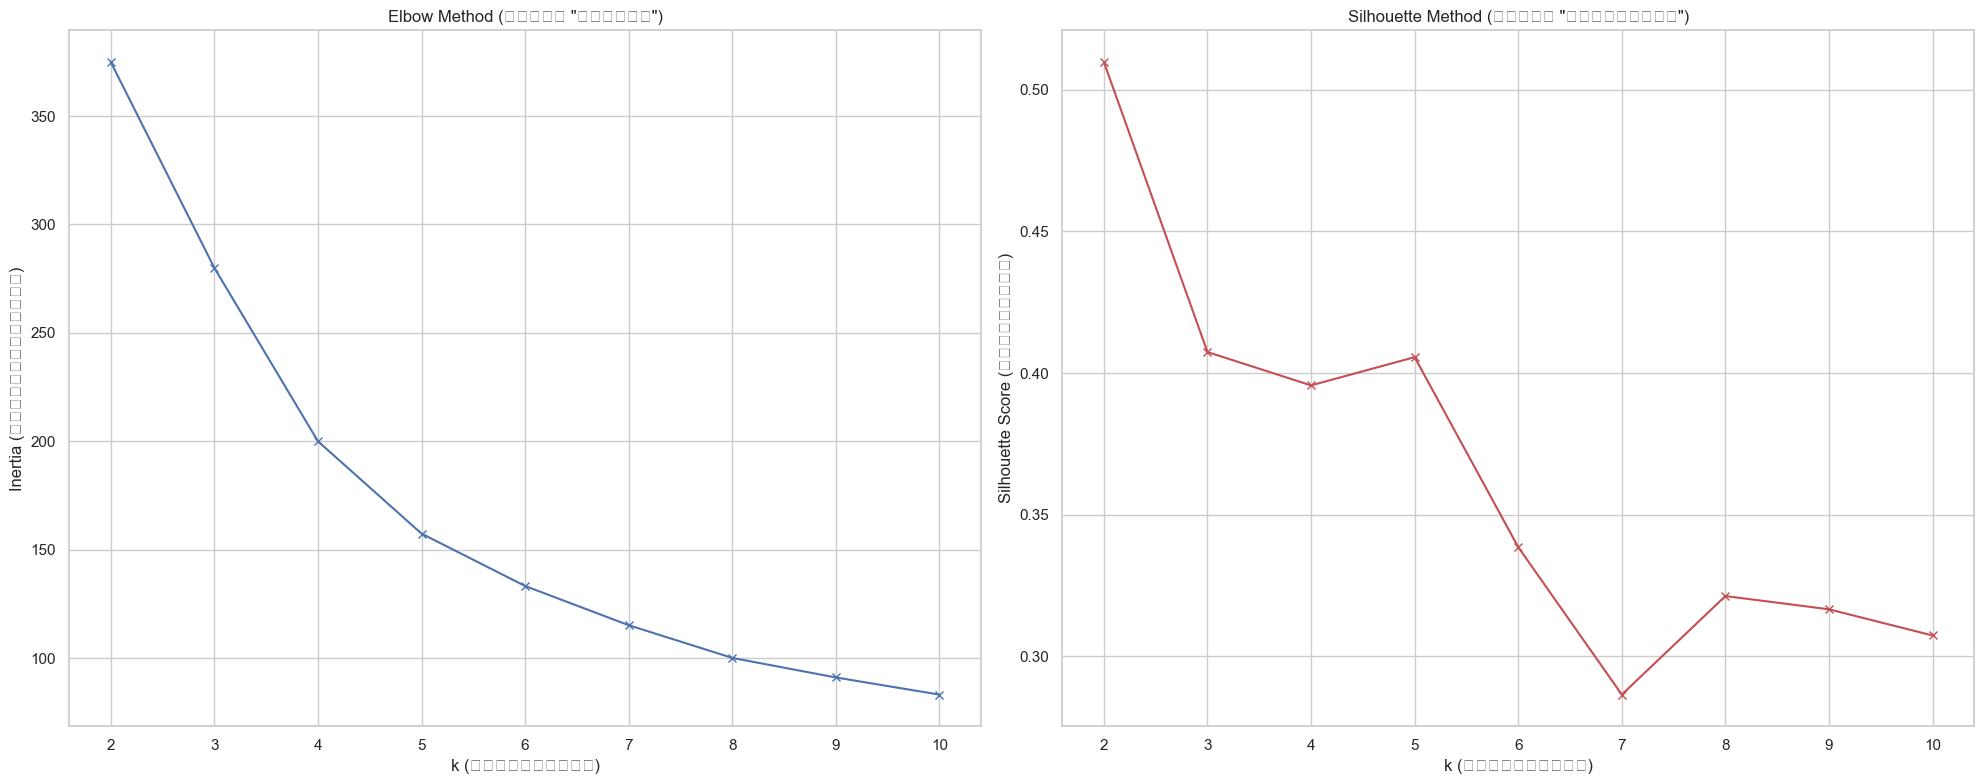

In [83]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


print("---หา K ที่เหมาะสม (Elbow + Silhouette)---")

#Scale ข้อมูล (เหมือนเดิม)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(df_features)

#เตรียม Loop
inertia_scores = [] #สำหรับ Elbow
silhouette_scores = [] #สำหรับ Silhouette
K_range = range(2, 11) #Silhouette ต้องเริ่มที่ 2 กลุ่มขึ้นไป

for k in K_range:
    #รัน K-Means
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(features_scaled)
    
    #เก็บค่า Elbow
    inertia_scores.append(kmeans.inertia_)
    
    #เก็บค่า Silhouette
    silhouette_avg = silhouette_score(features_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

#---พล็อตกราฟ 2 อัน ---
plt.figure(figsize=(20, 8))

#กราฟ 1: Elbow Method (เหมือนเดิม)
plt.subplot(1, 2, 1)
plt.plot(K_range, inertia_scores, 'bx-')
plt.xlabel('k (จำนวนกลุ่ม)')
plt.ylabel('Inertia (ค่าความเฉื่อย)')
plt.title('Elbow Method (มองหา "ข้อศอก")')
plt.grid(True)

#กราฟ 2: Silhouette Method
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, 'rx-')
plt.xlabel('k (จำนวนกลุ่ม)')
plt.ylabel('Silhouette Score (ค่าเฉลี่ย)')
plt.title('Silhouette Method (มองหา "จุดสูงสุด")')
plt.grid(True)
plt.tight_layout()
plt.show()

In [84]:
import pandas as pd

print("---ตารางสรุป: เทียบผล Elbow vs Silhouette---")
print("\n")
#สร้างตารางสรุป
#(K_range คือตัวแปร range(2, 11) จากเซลล์ก่อนหน้า)
summary_data = {
    'Inertia (Elbow)': inertia_scores,
    'Silhouette Score': silhouette_scores
}
df_k_summary = pd.DataFrame(summary_data, index=K_range)
df_k_summary.index.name = 'K (จำนวนกลุ่ม)'

#(Optional) เพิ่มคอลัมน์ "ความเปลี่ยนแปลง" (Delta)
#เพื่อช่วยดู "ข้อศอก" ได้ง่ายขึ้น
df_k_summary['Inertia_Delta'] = df_k_summary['Inertia (Elbow)'].diff().fillna(0)

#พิมพ์ตาราง
print(df_k_summary.to_markdown(floatfmt=".3f"))

---ตารางสรุป: เทียบผล Elbow vs Silhouette---


|   K (จำนวนกลุ่ม) |   Inertia (Elbow) |   Silhouette Score |   Inertia_Delta |
|---------------:|------------------:|-------------------:|----------------:|
|              2 |           374.898 |              0.510 |           0.000 |
|              3 |           279.982 |              0.407 |         -94.916 |
|              4 |           200.034 |              0.396 |         -79.948 |
|              5 |           157.453 |              0.406 |         -42.581 |
|              6 |           133.299 |              0.339 |         -24.154 |
|              7 |           115.222 |              0.286 |         -18.077 |
|              8 |           100.137 |              0.321 |         -15.085 |
|              9 |            91.122 |              0.317 |          -9.015 |
|             10 |            83.210 |              0.307 |          -7.912 |


---รัน K-Means---
กำลังพล็อต 2 กราฟ:


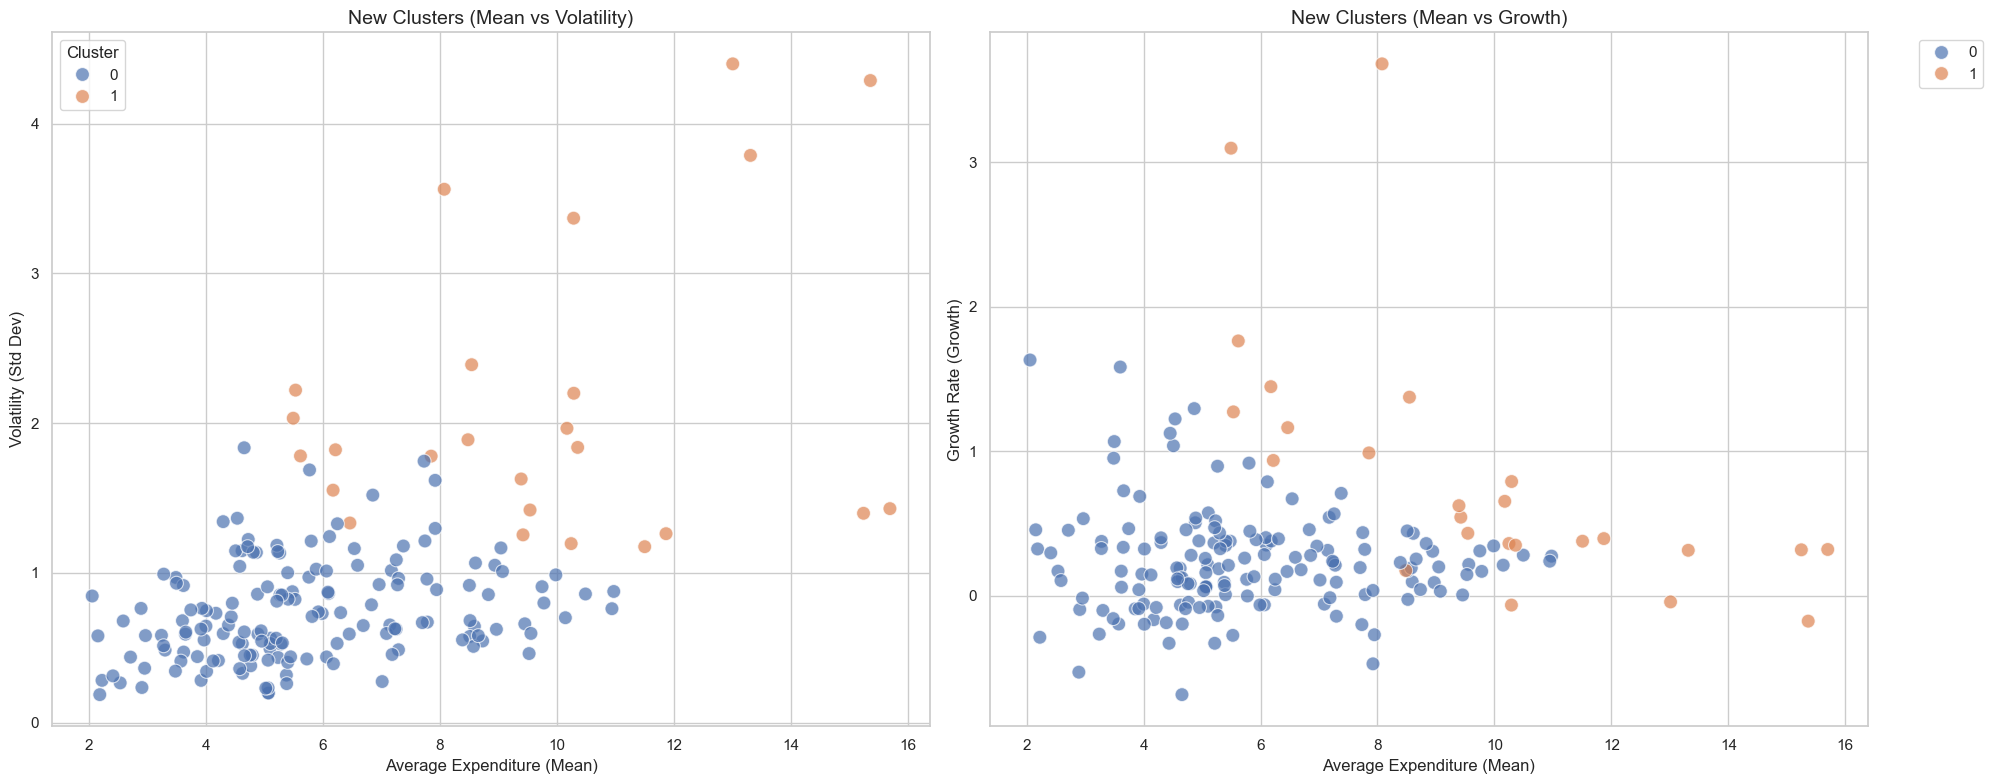

In [85]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
print("---รัน K-Means---")

#รัน K-Means (ด้วย K ที่คุณเลือกจาก Cell 16)
K_OPTIMAL = 2 #*****เปลี่ยนค่า K
kmeans = KMeans(n_clusters=K_OPTIMAL, random_state=42, n_init=10)
clusters = kmeans.fit_predict(features_scaled)

#เพิ่มผลลัพธ์ (Cluster) กลับไปที่ตาราง
df_features['Cluster'] = clusters

#พล็อตผลลัพธ์ (Scatter Plot)
print("กำลังพล็อต 2 กราฟ:")
plt.figure(figsize=(20, 8))
sns.set_theme(style="whitegrid")

#กราฟ 1: Mean (แกน X) vs Volatility (แกน Y)
plt.subplot(1, 2, 1)
sns.scatterplot(
    data=df_features,
    x='mean_exp',
    y='std_exp',
    hue='Cluster', #ระบายสีตาม "คลัสเตอร์ใหม่"
    palette="deep",
    s=100, alpha=0.7
)
plt.title('New Clusters (Mean vs Volatility)', fontsize=14)
plt.xlabel('Average Expenditure (Mean)')
plt.ylabel('Volatility (Std Dev)')

#กราฟ 2: Mean (แกน X) vs Growth (แกน Y)
plt.subplot(1, 2, 2)
sns.scatterplot(
    data=df_features,
    x='mean_exp',
    y='growth_rate',
    hue='Cluster',
    palette="deep",
    s=100, alpha=0.7
)
plt.title('New Clusters (Mean vs Growth)', fontsize=14)
plt.xlabel('Average Expenditure (Mean)')
plt.ylabel('Growth Rate (Growth)')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
print(f"---ตีความ {K_OPTIMAL} คลัสเตอร์ใหม่")

#เราจะดู "ค่าเฉลี่ย" ของ Feature ในแต่ละกลุ่ม
cluster_summary = df_features.groupby('Cluster')[['mean_exp', 'std_exp', 'growth_rate']].mean()

print(cluster_summary.to_markdown(floatfmt=".2f"))

print("---ประเทศทั้งหมดในแต่ละกลุ่ม (เรียงตามคลัสเตอร์)---")
#เรียงตาม Cluster เพื่อให้ดูง่าย)
print(df_features[['Cluster']].sort_values(by='Cluster').to_markdown())

---ตีความ 2 คลัสเตอร์ใหม่
|   Cluster |   mean_exp |   std_exp |   growth_rate |
|----------:|-----------:|----------:|--------------:|
|         0 |       5.74 |      0.74 |          0.23 |
|         1 |       9.77 |      2.12 |          0.84 |
---ประเทศทั้งหมดในแต่ละกลุ่ม (เรียงตามคลัสเตอร์)---
| Country Code   |   Cluster |
|:---------------|----------:|
| AGO            |         0 |
| ALB            |         0 |
| AND            |         0 |
| ARE            |         0 |
| ARG            |         0 |
| ATG            |         0 |
| AUS            |         0 |
| AUT            |         0 |
| BGD            |         0 |
| AZE            |         0 |
| BEL            |         0 |
| BEN            |         0 |
| BGR            |         0 |
| BFA            |         0 |
| BHS            |         0 |
| BHR            |         0 |
| BRN            |         0 |
| BTN            |         0 |
| BIH            |         0 |
| BLR            |         0 |
| BLZ            |  

สรุป : 

Cluster 0: กลุ่ม นโยบายคงที่
กลุ่มนี้มีสัดส่วนการใช้จ่ายด้านสุขภาพเฉลี่ย (mean_exp) อยู่ที่ 5.74%
จุดเด่นที่สุดคือเสถียรภาพในการจัดสรรสัดส่วน(std_exp) ที่สูงมาก (ค่าเบี่ยงเบนต่ำเพียง 0.74)
สรุป: นี่คือกลุ่มประเทศส่วนใหญ่ของโลก ที่มีนโยบายการจัดสรรงบประมาณสุขภาพในสัดส่วนที่ค่อนข้างคงที่ ไม่หวือหวา

Cluster 1: กลุ่ม จัดสรรสุดขั้ว 
กลุ่มนี้มีสัดส่วนการใช้จ่ายเฉลี่ย (mean_exp) ที่สูงถึง 9.77% และมีอัตราการเพิ่มสัดส่วน (growth_rate) ที่สูงด้วย
แต่ก็มีความผันผวนของสัดส่วน (std_exp) ที่สูงมากเช่นกัน (2.12)
สรุป: นี่คือกลุ่มประเทศที่มีพฤติกรรมการจัดสรรทรัพยากรที่แตกต่างจากกลุ่มอื่นชัดเจน คือ
กลุ่มที่ทุ่มสัดส่วนให้สุขภาพสูงมาก (เช่น USA, JPN, GBR)
กลุ่มที่สัดส่วนที่จัดสรรไม่แน่นอน (เช่น ประเทศหมู่เกาะ หรือประเทศเปราะบาง ที่ std_exp สูง)